In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [11]:
# Define paths for test and train images
path1 = "D:/Image Segmentation/Adult tooth segmentation dataset/data_split/test/images"
path2 = "D:/Image Segmentation/Adult tooth segmentation dataset/data_split/train/images"

In [12]:
target_size = (224, 224)  # Resize target size

In [13]:
# Function to load and preprocess images from multiple directories
def preprocess_images(paths, target_size):
    images = []

    for dataset_path in paths:
        if not os.path.exists(dataset_path):
            print(f"Warning: Path {dataset_path} does not exist. Skipping...")
            continue

        for filename in os.listdir(dataset_path):
            if filename.lower().endswith((".jpg", ".png", ".jpeg")):
                img_path = os.path.join(dataset_path, filename)
                
                try:
                    img = Image.open(img_path)  # Open image
                    img_resized = img.resize(target_size)  # Resize
                    img_rgb = img_resized.convert('RGB')  # Ensure RGB format
                    image_array = np.array(img_rgb)  # Convert to numpy array
                    image_normalized = image_array / 255.0  # Normalize
                    images.append(image_normalized)

                    # Print first image's pixel values
                    if len(images) == 1:
                        print("First image (normalized) pixel values:\n", image_normalized)

                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

    return np.array(images)

In [14]:
# Preprocess images from both folders
images_array = preprocess_images([path1, path2], target_size)

First image (normalized) pixel values:
 [[[0.56862745 0.56862745 0.56862745]
  [0.62745098 0.62745098 0.62745098]
  [0.62745098 0.62745098 0.62745098]
  ...
  [0.62745098 0.62745098 0.62745098]
  [0.59607843 0.59607843 0.59607843]
  [0.58431373 0.58431373 0.58431373]]

 [[0.57647059 0.57647059 0.57647059]
  [0.63137255 0.63137255 0.63137255]
  [0.63921569 0.63921569 0.63921569]
  ...
  [0.62745098 0.62745098 0.62745098]
  [0.58039216 0.58039216 0.58039216]
  [0.58431373 0.58431373 0.58431373]]

 [[0.65490196 0.65490196 0.65490196]
  [0.65490196 0.65490196 0.65490196]
  [0.62352941 0.62352941 0.62352941]
  ...
  [0.64313725 0.64313725 0.64313725]
  [0.62352941 0.62352941 0.62352941]
  [0.60784314 0.60784314 0.60784314]]

 ...

 [[0.11372549 0.11372549 0.11372549]
  [0.11372549 0.11372549 0.11372549]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.14117647 0.14117647 0.14117647]
  [0.14509804 0.14509804 0.14509804]
  [0.14509804 0.14509804 0.14509804]]

 [[0.11372549 0.11372549 0.1137254


Total images loaded: 1978
Shape of first image: (224, 224, 3)

First image pixel values:
 [[[0.56862745 0.56862745 0.56862745]
  [0.62745098 0.62745098 0.62745098]
  [0.62745098 0.62745098 0.62745098]
  ...
  [0.62745098 0.62745098 0.62745098]
  [0.59607843 0.59607843 0.59607843]
  [0.58431373 0.58431373 0.58431373]]

 [[0.57647059 0.57647059 0.57647059]
  [0.63137255 0.63137255 0.63137255]
  [0.63921569 0.63921569 0.63921569]
  ...
  [0.62745098 0.62745098 0.62745098]
  [0.58039216 0.58039216 0.58039216]
  [0.58431373 0.58431373 0.58431373]]

 [[0.65490196 0.65490196 0.65490196]
  [0.65490196 0.65490196 0.65490196]
  [0.62352941 0.62352941 0.62352941]
  ...
  [0.64313725 0.64313725 0.64313725]
  [0.62352941 0.62352941 0.62352941]
  [0.60784314 0.60784314 0.60784314]]

 ...

 [[0.11372549 0.11372549 0.11372549]
  [0.11372549 0.11372549 0.11372549]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.14117647 0.14117647 0.14117647]
  [0.14509804 0.14509804 0.14509804]
  [0.14509804 0.145098

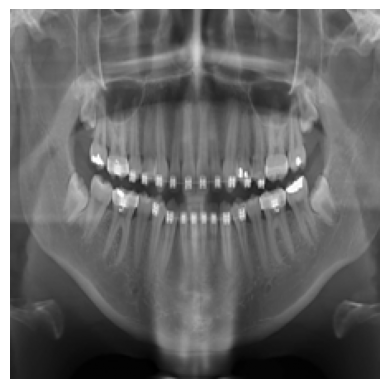

In [15]:
if len(images_array) > 0:
    print("\nTotal images loaded:", len(images_array))
    print("Shape of first image:", images_array[0].shape)
    print("\nFirst image pixel values:\n", images_array[0])  # Print pixel values

    # Show an example image
    plt.imshow(images_array[0])  # Display first image
    plt.axis("off")
    plt.show()
else:
    print("No images found! Check the dataset paths.")

In [16]:
import os
import numpy as np
from PIL import Image

# Define paths
base_output_dir = "D:/Image Segmentation/preprocessed_images"
train_output_dir = os.path.join(base_output_dir, "train", "images")
test_output_dir = os.path.join(base_output_dir, "test", "images")

# Create directories
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

def save_preprocessed_images_with_structure(paths, images_array, target_size):
    """
    Save preprocessed images maintaining the original folder structure
    """
    image_index = 0
    
    for dataset_path in paths:
        if not os.path.exists(dataset_path):
            print(f"Warning: Path {dataset_path} does not exist. Skipping...")
            continue
        
        # Determine if this is train or test folder
        if "train" in dataset_path.lower():
            current_output_dir = train_output_dir
            folder_type = "train"
        elif "test" in dataset_path.lower():
            current_output_dir = test_output_dir
            folder_type = "test"
        else:
            current_output_dir = base_output_dir
            folder_type = "unknown"
        
        print(f"Processing {folder_type} images...")
        folder_image_count = 0
        
        for filename in os.listdir(dataset_path):
            if filename.lower().endswith((".jpg", ".png", ".jpeg")):
                # Get the preprocessed image
                if image_index < len(images_array):
                    preprocessed_img = images_array[image_index]
                    
                    # Convert back to 0-255 range for saving
                    img_save = (preprocessed_img * 255).astype(np.uint8)
                    img_pil = Image.fromarray(img_save)
                    
                    # Create new filename (keep original name but ensure .jpg extension)
                    base_name = os.path.splitext(filename)[0]
                    new_filename = f"{base_name}_preprocessed.jpg"
                    save_path = os.path.join(current_output_dir, new_filename)
                    
                    # Save the image
                    img_pil.save(save_path)
                    
                    image_index += 1
                    folder_image_count += 1
        
        print(f"Saved {folder_image_count} {folder_type} images to {current_output_dir}")
    
    return image_index

# Save the preprocessed images
total_saved = save_preprocessed_images_with_structure([path1, path2], images_array, target_size)

print(f"\nSuccessfully saved {total_saved} preprocessed images!")

# Verify the saved images
print(f"\nVerification:")
train_saved = len([f for f in os.listdir(train_output_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
test_saved = len([f for f in os.listdir(test_output_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

print(f"Train images saved: {train_saved}")
print(f"Test images saved: {test_saved}")
print(f"Total images saved: {train_saved + test_saved}")

Processing test images...
Saved 478 test images to D:/Image Segmentation/preprocessed_images\test\images
Processing train images...
Saved 1500 train images to D:/Image Segmentation/preprocessed_images\train\images

Successfully saved 1978 preprocessed images!

Verification:
Train images saved: 1500
Test images saved: 478
Total images saved: 1978
